In [122]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.cm import get_cmap
from matplotlib.lines import Line2D
import pandas as pd
import re
import seaborn as sns

def get_patient_name(path):
    return re.search(r"/data/\w+/([A-Z]{3})", path).group(1)

def get_class_name(path):
    return re.search(r"/data/(\w+)", path).group(1)

def get_classification_patient(patient_folder):
    probs_path = patient_folder + '/single_cell_probabilities.npy'
    sc_probs = np.load(probs_path)
    sc_class= np.argmax(sc_probs, axis=1)
    return sc_class

def get_image_number(path):
    return int(re.search(r"image_(\d+).tif", path).group(1))


../../smalldataset/data/RUNX1_RUNX1T1/DHA


'DHA'

In [3]:
def get_counts_vector(labels_vector):
    unique_labels, label_counts = np.unique(labels_vector, return_counts=True)
    counts_vector = np.zeros(21, dtype=int)
    counts_vector[unique_labels] = label_counts
    return counts_vector, unique_labels

sc_class_labels= ['eosinophil granulocyte', 'reactive lymphocyte',
       'neutrophil granulocyte (segmented)', 'typical lymphocyte',
       'other', 'neutrophil granulocyte (band)', 'monocyte',
       'large granulated lymphocyte', 'atypical promyelocyte',
       'basophil granulocyte', 'smudge cell', 'neoplastic lymphocyte',
       'promyelocyte', 'myelocyte', 'myeloblast', 'metamyelocyte',
       'normo', 'plasma cell', 'hair cell', 'bilobed M3v',
       'mononucleosis']

aml_class_labels = ["CBFB_MYH11","control","NPM1","PML_RARA","RUNX1_RUNX1T1"]

# Path to the folder containing your files
data_path = '../../smalldataset/data'
result_path = '../../smalldataset/data/output'

In [12]:

for folder_class in os.listdir(data_path):
    folder_class = os.path.join(data_path, folder_class)
    
    if os.path.isdir(folder_class):
       print(folder_class)
       for folder_patient in os.listdir(folder_class):
            folder_patient = os.path.join(folder_class, folder_patient)
            
            if os.path.isdir(folder_patient):
                if "single_cell_probabilities.npy" not in os.listdir(folder_patient):
                    print("Skipping patient folder without single_cell_probabilities.npy:", folder_patient)
                    continue
                sc_class = get_classification_patient(folder_patient)
                subset = np.random.choice(np.arange(len(sc_class)),size=10) 
                print(folder_patient)
                for image_number in subset:
                    image_file_path=os.path.join(folder_patient,f"image_{image_number}.tif")
            
                    tif_image = Image.open(image_file_path)
                    print(f"Classification {sc_class_labels[sc_class[image_number]]}")
                    #tif_image.show()
                print(subset)

../../smalldataset/data/CBFB_MYH11
../../smalldataset/data/CBFB_MYH11/AQK
Classification typical lymphocyte
Classification typical lymphocyte
Classification typical lymphocyte
Classification large granulated lymphocyte
Classification typical lymphocyte
Classification typical lymphocyte
Classification typical lymphocyte
Classification typical lymphocyte
Classification typical lymphocyte
Classification typical lymphocyte
[ 26  15 105  46 277 223 383 234 240  19]
../../smalldataset/data/CBFB_MYH11/BJK
Classification neutrophil granulocyte (band)
Classification neutrophil granulocyte (segmented)
Classification typical lymphocyte
Classification typical lymphocyte
Classification myeloblast
Classification typical lymphocyte
Classification typical lymphocyte
Classification atypical promyelocyte
Classification myeloblast
Classification monocyte
[131 148 251  44 116 287 374  55 196 124]
../../smalldataset/data/CBFB_MYH11/BSN
Classification eosinophil granulocyte
Classification myeloblast
Classif

In [ ]:
def create_dataset(root_dirs):
    # Create dataset
    data = []
    for sgl_dir in root_dirs:
        for file_sgl in os.listdir(sgl_dir):

            if not '.tif' in file_sgl:
                        continue

            data.append(os.path.join(sgl_dir, file_sgl))
    
    # Convert the list to a NumPy array
    data = np.array(data)

    # Extract numerical part for sorting
    numeric_part = np.array([int(name.split('image_')[1].split('.tif')[0]) for name in data])

    # Get the indices that would sort the numeric part
    sorted_indices = np.argsort(numeric_part)

    # Use the sorted indices to rearrange the file names array
    sorted_images = data[sorted_indices]

    return sorted_images

In [102]:
# Create single cell probalities for specific artificial patient
import pickle
artificial_folder_path = "../../artificialdata/experiment_3/data/CBFB_MYH11/patient_1"
with open( os.path.join(artificial_folder_path,"image_file_paths") ,'rb') as fp:
    image_file_paths=pickle.load(fp)

prev_subtype= get_class_name(image_file_paths[0]) 
prev_patient = get_patient_name(image_file_paths[0])
probs_path = data_path +"/"+ prev_subtype +"/"+ prev_patient+'/single_cell_probabilities.npy'

sc_probs_artificial_list=[]
for image_path in image_file_paths:
    aml_subtype = get_class_name(image_path)    
    patient = get_patient_name(image_path)   
    image_number = get_image_number(image_path)
    if aml_subtype!=prev_subtype or prev_patient!=patient:
        probs_path = data_path +"/"+ aml_subtype +"/"+ patient+'/single_cell_probabilities.npy'
    prev_patient=patient
    prev_subtype=aml_subtype
    sc_probs = np.load(probs_path)[image_number]
    sc_probs_artificial_list.append([sc_probs])
sc_probs_artificial = np.concatenate(sc_probs_artificial_list,axis=0)    

np.save(artificial_folder_path+"/single_cell_probabilities.npy", sc_probs_artificial)    

In [104]:
# Set the path to the folder containing your TIF images
#folder_path = "../../smalldataset/data/CBFB_MYH11/AQK"
folder_path = "../../artificialdata/experiment_3/data/CBFB_MYH11/patient_1"

# Get a list of all TIF files in the folder
tif_files = [file for file in os.listdir(folder_path) if file.endswith(".tif")]
sc_class = get_classification_patient(folder_path)

In [129]:
num_columns = 10  # Number of images per row
num_rows = 10
colors = plt.cm.get_cmap("tab20")(np.arange(len(sc_class_labels)))

# Choose a random subset of TIF files
random_tif_files = random.sample(tif_files, min(num_rows*num_columns, len(tif_files)))
#random_tif_files = random.sample(image_file_paths, min(num_rows*num_columns, len(image_file_paths)))

/tmp/ipykernel_2171/1599849314.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab20")(np.arange(len(sc_class_labels)))


FileNotFoundError: [Errno 2] No such file or directory: '../../artificialdata/experiment_3/data/CBFB_MYH11/patient_1/../../smalldataset/data/NPM1/DPF/image_27.tif'

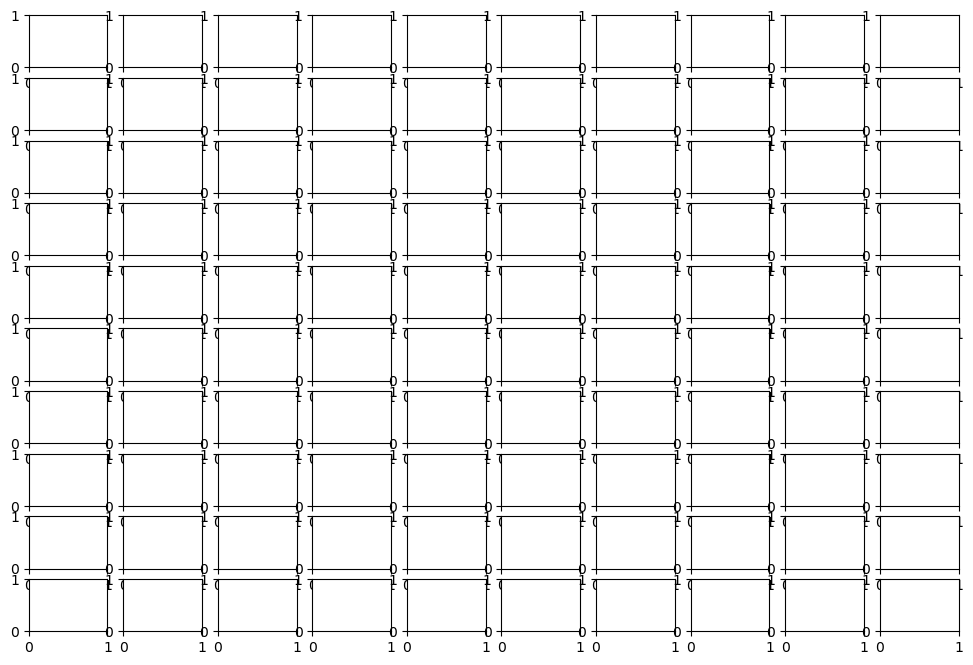

In [130]:
# Create a figure to display the images
fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 8))

# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()

# Display each image in the figure
for i, tif_file in enumerate(random_tif_files):
    image_path = os.path.join(folder_path, tif_file)
    tif_image = Image.open(image_path)
    image_number = get_image_number(tif_file)
    color = colors[sc_class[image_number]]
    
    axes[i].imshow(tif_image)

    # Hide x and y axis 
    for spine in axes[i].spines.values():
        spine.set_linewidth(5)  # Adjust the line width
        spine.set_color(color)
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)

# Add legend
legend_labels = sc_class_labels
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=i) for i in range(len(sc_class_labels))]
fig.legend(handles=legend_handles, labels=legend_labels, loc='upper right')

# Adjust layout and display the figure
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rectangle to make space for the legend

plt.savefig(f"../../Figures/{get_class_name(folder_path)}patient_1.png")
plt.show()

fig.tight_layout()
plt.show()

In [126]:
random_tif_files

[]

In [127]:
image_file_paths


['../../smalldataset/data/CBFB_MYH11/AQK/image_151.tif',
 '../../smalldataset/data/CBFB_MYH11/AQK/image_165.tif',
 '../../smalldataset/data/CBFB_MYH11/AQK/image_171.tif',
 '../../smalldataset/data/CBFB_MYH11/AQK/image_220.tif',
 '../../smalldataset/data/CBFB_MYH11/AQK/image_238.tif',
 '../../smalldataset/data/CBFB_MYH11/AQK/image_319.tif',
 '../../smalldataset/data/CBFB_MYH11/AQK/image_355.tif',
 '../../smalldataset/data/CBFB_MYH11/AQK/image_47.tif',
 '../../smalldataset/data/CBFB_MYH11/AQK/image_63.tif',
 '../../smalldataset/data/CBFB_MYH11/AQK/image_97.tif',
 '../../smalldataset/data/CBFB_MYH11/BJK/image_109.tif',
 '../../smalldataset/data/CBFB_MYH11/BJK/image_128.tif',
 '../../smalldataset/data/CBFB_MYH11/BJK/image_156.tif',
 '../../smalldataset/data/CBFB_MYH11/BJK/image_206.tif',
 '../../smalldataset/data/CBFB_MYH11/BJK/image_22.tif',
 '../../smalldataset/data/CBFB_MYH11/BJK/image_223.tif',
 '../../smalldataset/data/CBFB_MYH11/BJK/image_227.tif',
 '../../smalldataset/data/CBFB_MYH1

In [110]:
re.search(r"image_(\d+).tif", tif_file).group(1)

'306'